In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('./data/adult.csv')
df = data.copy()
data

In [ ]:
data.info()

In [ ]:
df.describe()

In [ ]:

unknown_val = '?'
count_per_column = df.apply(lambda col: col.value_counts().get(unknown_val, 0))
count_per_column

df['workclass'] = df['workclass'].str.replace('?', 'Private', regex=False)
df['occupation'] = df['occupation'].str.replace('?', 'Prof-speciality', regex=False)
df['native.country'] = df['native.country'].str.replace('?', 'United-States', regex=False)


In [ ]:
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [ ]:
#martial status
df['marital.status']= df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital.status']= df['marital.status'].replace(['Never-married'], 'not-married')
df['marital.status']= df['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [ ]:
df.hist(figsize=[12, 10])

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=[12, 6])
sns.heatmap(numeric_df.corr(), annot = True, cmap='YlGnBu')

In [ ]:
numeric_cols = numeric_df.columns
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
df.head()

In [ ]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], dtype=int)

In [ ]:
df['income'] = df['income'].apply(lambda inc : 1 if inc == ">50K" else 0)
df['income'].value_counts()

In [19]:
cols = list(filter(lambda colname: "_" in colname, df.columns))
cols

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_doc',
 'education_grad',
 'education_high school',
 'education_higher',
 'education_school',
 'education_undergrad',
 'marital.status_married',
 'marital.status_not-married',
 'marital.status_other',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-speciality',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarr

In [ ]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [37]:
weis = np.zeros(X_train.shape[1])
bias = 0
alpha = 1.8

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

loss = np.zeros(10000)
m = X_train.shape[0]

for i in range(10000):  # number of epochs
    linear_model = np.dot(X_train, weis) + bias
    y_predicted = sigmoid(linear_model)

    loss[i] = -np.mean(y_train * np.log(y_predicted) + (1 - y_train) * np.log(1 - y_predicted))
    
    dw = (1 / m) * np.dot(X_train.T, (y_predicted - y_train))
    db = (1 / m) * np.sum(y_predicted - y_train)
    
    weis -= 0.01 * dw  # 0.01 is the learning rate
    bias -= 0.01 * db


#### Batch updates version

In [34]:
# batch_size = 108  # Define the size of each mini-batch
# loss = np.zeros(10000)
# m = X_train.shape[0]
# weis = np.zeros(X_train.shape[1])
# bias = 0
# alpha = 0.8


# for i in range(10000):  # number of epochs
#     for j in range(0, m, batch_size):  # Loop through the dataset in batches
#         batch_X = X_train[j:j+batch_size]
#         batch_y = y_train[j:j+batch_size]

#         linear_model = np.dot(batch_X, weis) + bias
#         y_predicted = sigmoid(linear_model)

#         loss[i] = -np.mean(batch_y * np.log(y_predicted) + (1 - batch_y) * np.log(1 - y_predicted))

#         dw = (1 / batch_size) * np.dot(batch_X.T, (y_predicted - batch_y))
#         db = (1 / batch_size) * np.sum(y_predicted - batch_y)

#         weis -= alpha * dw
#         bias -= alpha * db


KeyboardInterrupt: 

In [ ]:
y_pred = sigmoid(np.dot(X_test, weis) + bias)  >= 0.5
y_pred

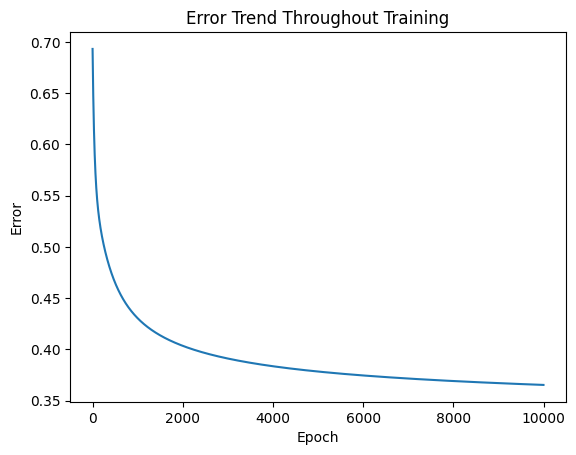

In [38]:
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Trend Throughout Training')
plt.show()

In [39]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8133258887027731
